In [68]:
# !pip install numpy pandas matplotlib seaborn Scipy mlxtend scikit-learn tensorflow keras

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Churn_Modelling.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum(), df.duplicated().sum()

(RowNumber          0
 CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 np.int64(0))

In [4]:
df['Exited'].value_counts(), df['Geography'].value_counts(), df['Gender'].value_counts()

(Exited
 0    7963
 1    2037
 Name: count, dtype: int64,
 Geography
 France     5014
 Germany    2509
 Spain      2477
 Name: count, dtype: int64,
 Gender
 Male      5457
 Female    4543
 Name: count, dtype: int64)

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
le_geography = LabelEncoder()
df['Geography'] = le_geography.fit_transform(df['Geography'])
with open('./Encoder_geography.pkl','wb') as file:
    pickle.dump(le_geography, file)
df['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [7]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
with open('./Encoder_gender.pkl','wb') as file:
    pickle.dump(le_gender, file)
df['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
x = df.iloc[:,:-1]
y = df['Exited']

In [10]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
with open('./Scaler.pkl','wb') as file:
    pickle.dump(scaler, file)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape, y_train.shape

((8000, 10), (8000,))

In [13]:
x_test.shape, y_test.shape

((2000, 10), (2000,))

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim = 10))
model.add(Dense(10, activation='relu', input_dim = 10))
model.add(Dense(5, activation='relu', input_dim = 10))
model.add(Dense(1, activation='sigmoid'))

f:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7761 - loss: 0.5471 - val_accuracy: 0.7987 - val_loss: 0.4484
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4490 - val_accuracy: 0.8163 - val_loss: 0.4285
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4294 - val_accuracy: 0.8331 - val_loss: 0.4122
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.4121 - val_accuracy: 0.8431 - val_loss: 0.3997
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.3923 - val_accuracy: 0.8438 - val_loss: 0.3848
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3752 - val_accuracy: 0.8475 - val_loss: 0.3769
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.3669 - val_accuracy: 0.8475 - val_loss: 0.3719
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3623 - val_accu

In [19]:
model.layers[0].get_weights(), model.layers[1].get_weights()

([array([[-2.16673732e-01,  7.94882104e-02,  2.90482074e-01,
          -8.36568046e-03, -8.48680735e-02, -1.67677961e-02,
           7.36418739e-02, -6.87052086e-02, -9.04099829e-03,
          -9.84754488e-02],
         [-4.05567616e-01, -4.01243530e-02,  2.53146410e-01,
          -1.73101738e-01, -1.26513350e+00,  7.29625821e-02,
          -4.31352794e-01,  4.60850090e-01, -1.85838610e-01,
          -8.08108822e-02],
         [ 3.96164238e-01,  3.64874899e-01, -2.03901514e-01,
           1.96692303e-01,  8.40579644e-02,  1.08821809e-01,
           2.25395337e-01,  1.92834944e-01, -6.52193790e-03,
           6.19850874e-01],
         [ 3.95954311e-01,  5.22172153e-01, -1.92673594e-01,
          -4.24782306e-01, -7.88006783e-01, -3.03818993e-02,
          -3.79489243e-01, -4.08325583e-01,  8.70932519e-01,
          -6.66373253e-01],
         [ 3.78715515e-01,  1.57635570e-01, -4.23468798e-01,
          -5.26270390e-01, -1.11745752e-01, -6.72478080e-02,
          -1.52383596e-01, -7.9602

In [20]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
y_train_pred = np.where(y_train_pred>0.5,1,0)

y_test_pred = np.where(y_test_pred>0.5,1,0)

y_train_pred, y_test_pred

(array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [1]], shape=(8000, 1)),
 array([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]], shape=(2000, 1)))

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.866125, 0.8655)

In [24]:
import matplotlib.pyplot as plt

In [25]:
history

In [26]:
history.history

{'accuracy': [0.7760937213897705,
  0.7990624904632568,
  0.817187488079071,
  0.8326562643051147,
  0.8465625047683716,
  0.854687511920929,
  0.8575000166893005,
  0.8575000166893005,
  0.8568750023841858,
  0.8571875095367432,
  0.8557812571525574,
  0.8568750023841858,
  0.8575000166893005,
  0.8576562404632568,
  0.8587499856948853,
  0.8596875071525574,
  0.8592187762260437,
  0.860156238079071,
  0.8610937595367432,
  0.8617187738418579,
  0.8615624904632568,
  0.8606250286102295,
  0.8623437285423279,
  0.8626562356948853,
  0.8617187738418579,
  0.8609374761581421,
  0.8617187738418579,
  0.8635937571525574,
  0.8629687428474426,
  0.8614062666893005,
  0.8623437285423279,
  0.8606250286102295,
  0.8626562356948853,
  0.8620312213897705,
  0.8615624904632568,
  0.8635937571525574,
  0.8639062643051147,
  0.8639062643051147,
  0.8637499809265137,
  0.8629687428474426,
  0.8631250262260437,
  0.86328125,
  0.86328125,
  0.862500011920929,
  0.8634374737739563,
  0.86203122138977

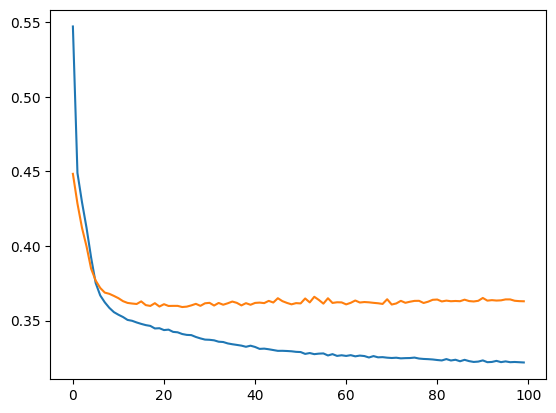

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

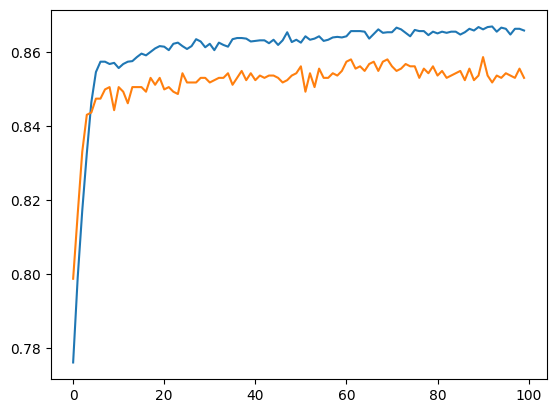

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
import numpy as np
import pandas as pd
import pickle
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

In [31]:
model = load_model('./Model/ann_model.h5')

In [32]:
with open('./Scaler.pkl','rb') as file:
    scaler = pickle.load(file)
with open('./Encoder_gender.pkl','rb') as file:
    en_gender = pickle.load(file)
with open('./Encoder_geography.pkl','rb') as file:
    en_geography = pickle.load(file)

In [33]:
geology = en_geography.transform(['France'])
gender = en_gender.transform(['Female'])
geology, gender

(array([0]), array([0]))

In [34]:
data = scaler.transform([[619,0,0,42,2,0,1,1,1,101348.88]])
data

f:\Windows 10\Python Files\Projects\py_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.32622142, -0.90188624, -1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.97024255,  0.02188649]])

In [35]:
model.predict(data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[0.4665925]], dtype=float32)